# Loss Functions

## Loss functions can be broadly categorized into 2 types:

Regression:
* Mean Square Error / Quadratic Loss
* Mean Absolute Error
* Huber Loss/ Smooth Mean Absolute Error
* Log cosh Loss
* Quantile Loss

Clasification:
* Log Loss
* Focal Loss
* KL Divergence / Relative Entropy 
* Expontial Loss
* Hinge Loss

In [1]:
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)

In [4]:
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))

In [5]:
def sm_mae(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

In [6]:
def kld(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: KL divergence loss
    """
    loss = pred*(np.log(pred) - true)
    return np.sum(loss)

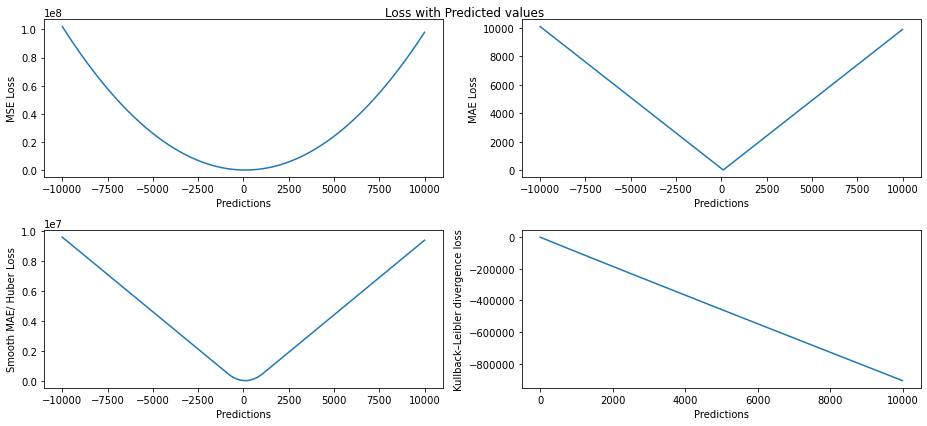

In [7]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (13,6))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

# calculating loss function for all predictions. 
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
loss_sm_mae = [sm_mae(target[i], pred[i], 1000) for i in range(len(pred))]
loss_kld = [kld(target[i], pred[i]) for i in range(len(pred))]


# plot for MSE
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('MSE Loss')

# plot for MAE
ax2.plot(pred, loss_mae)
ax2.set_xlabel('Predictions')
ax2.set_ylabel('MAE Loss')

# plot for Smooth MAE
ax3.plot(pred, loss_sm_mae)
ax3.set_xlabel('Predictions')
ax3.set_ylabel('Smooth MAE/ Huber Loss')

# plot for KL divergence
ax4.plot(pred, loss_kld)
ax4.set_xlabel('Predictions')
ax4.set_ylabel('Kullback–Leibler divergence loss')

fig.suptitle("Loss with Predicted values")
fig.tight_layout()

In [8]:
def expo(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: Exponential loss
    """
    loss = np.sum((true - pred)**2)
    return gamma*np.exp(loss/gamma)

In [9]:
def expo_reg(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: Exponential loss
    """
    loss = np.sum((true - pred)**2)
    return gamma*np.exp(loss/gamma)

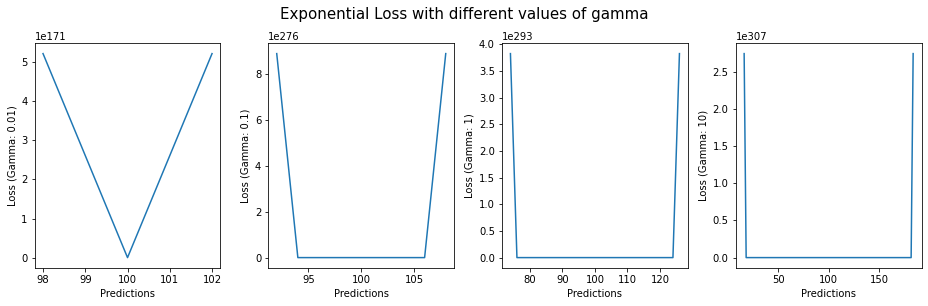

In [10]:
fig, ax = plt.subplots(1, 4, figsize = (13,4))

ax1, ax2, ax3, ax4 = ax.flatten() # extracting all 4 axes using flatten

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

# calculating loss function for all predictions. 
loss_exp1 = [expo_reg(target[i], pred[i], 0.01) for i in range(len(pred))]
loss_exp2 = [expo_reg(target[i], pred[i], .1) for i in range(len(pred))]
loss_exp3 = [expo_reg(target[i], pred[i], 1) for i in range(len(pred))]
loss_exp4 = [expo_reg(target[i], pred[i], 10) for i in range(len(pred))]

# plots for exponential loss with different gamma

ax1.plot(pred, loss_exp1)
ax2.plot(pred, loss_exp2)
ax3.plot(pred, loss_exp3)
ax4.plot(pred, loss_exp4)

ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss (Gamma: 0.01)')

ax2.set_xlabel('Predictions')
ax2.set_ylabel('Loss (Gamma: 0.1)')

ax3.set_xlabel('Predictions')
ax3.set_ylabel('Loss (Gamma: 1)')

ax4.set_xlabel('Predictions')
ax4.set_ylabel('Loss (Gamma: 10)')

fig.suptitle('Exponential Loss with different values of gamma' , y = 1.05, fontsize=15)

fig.tight_layout()

In [11]:
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

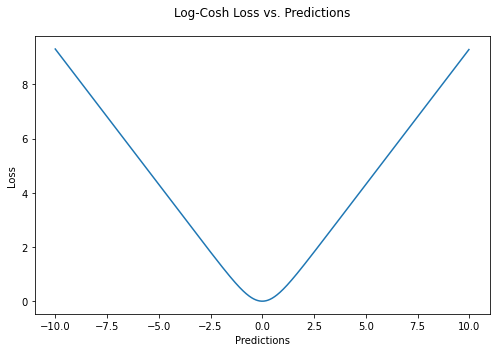

In [12]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_logcosh)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions", pad=20)

fig.tight_layout()

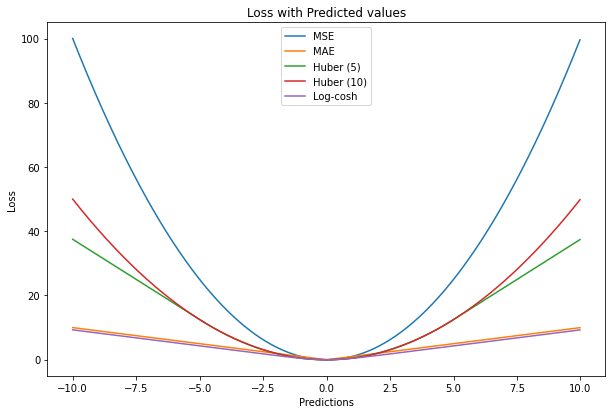

In [13]:
# All Regression in one plot

fig, ax1 = plt.subplots(1,1, figsize = (10,6.5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

# calculating loss function for all predictions. 
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
loss_sm_mae1 = [sm_mae(target[i], pred[i], 5) for i in range(len(pred))]
loss_sm_mae2 = [sm_mae(target[i], pred[i], 10) for i in range(len(pred))]
loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]

losses = [loss_mse, loss_mae, loss_sm_mae1, loss_sm_mae2, loss_logcosh]
names = ['MSE', 'MAE','Huber (5)', 'Huber (10)', 'Log-cosh']

for lo in range(len(losses)):
    ax1.plot(pred, losses[lo], label = names[lo])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Loss with Predicted values")
ax1.legend()

In [14]:
def bin_ce(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, np.log(pred), np.log(1-pred))
    return -np.sum(loss)

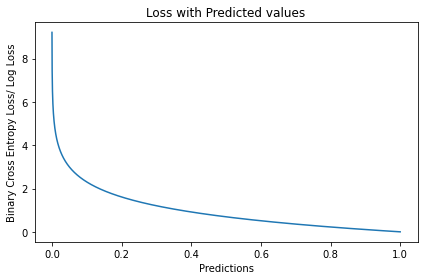

In [15]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_bin_ce = [bin_ce(target[i], pred[i]) for i in range(len(pred))]

# plot for binary cross entropy
ax1.plot(pred, loss_bin_ce)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/ Log Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()


In [16]:
def focal(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, (1-pred)**gamma*(np.log(pred)), pred**gamma*(np.log(1-pred)))
    return -np.sum(loss)

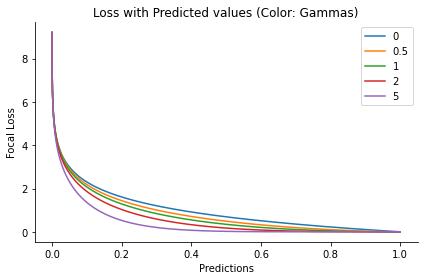

In [17]:

fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
gammas = [0, 0.5, 1, 2, 5]
losses_focal = [[focal(target[i], pred[i], gamma) for i in range(len(pred))] for gamma in gammas]

# plot for binary cross entropy
for i in range(len(gammas)):
    ax1.plot(pred, losses_focal[i], label = gammas[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Focal Loss')
ax1.set_title("Loss with Predicted values (Color: Gammas)")
ax1.legend()

# make right and top lines invisible
ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible

fig.tight_layout()

In [18]:
def hinge(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.max((0, (1 - pred*true)))
    return np.sum(loss)

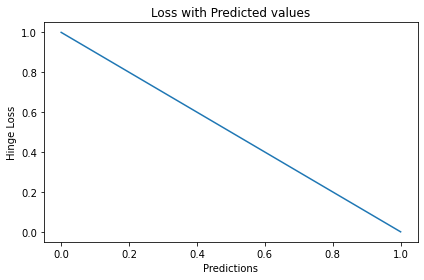

In [19]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_hinge)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Hinge Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

In [20]:
def sq_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = (1 - pred*true)**2
    return np.sum(loss)

Text(0.5, 1.0, 'Loss with Predicted values')

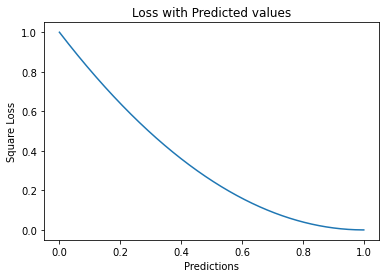

In [21]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_sq = [sq_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_sq)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Square Loss')
ax1.set_title("Loss with Predicted values")


In [22]:

def log_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.log(1 + np.exp(-(pred*true)))/np.log(2)
    return np.sum(loss)


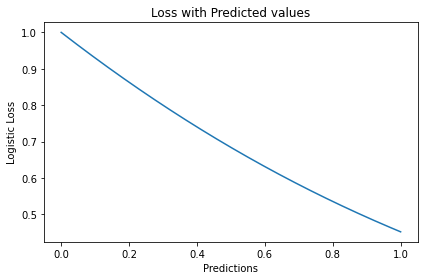

In [23]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_log_loss = [log_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Logistic Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

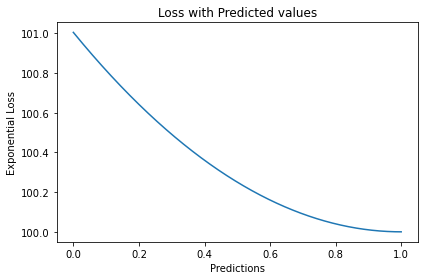

In [24]:

fig, ax1 = plt.subplots()

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_exp = [expo(target[i], pred[i], 100) for i in range(len(pred))]

# plot for exponential loss
ax1.plot(pred, loss_exp)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Exponential Loss')
ax1.set_title("Loss with Predicted values")
fig.tight_layout()

L1-norm loss function is also known as least absolute deviations (LAD), least absolute errors (LAE). It is basically minimizing the sum of the absolute differences (S) between the true value (Yi) and the predicted values (f(xi))

 <img src=".\Images\l1.png">

L2-norm loss function is also known as least squares error (LSE). It is basically minimizing the sum of the square of the differences (S) between the true value (Yi) and the predicted values (f(xi)

<img src=".\Images\l2.png">
 
The difference of L1-norm and L2-norm as a loss function:

L1:
* Robust.
* Unstable solution.
* Possibly multiple solutions.

L2:
* Not very Robust. 
* Stable solution.
* Always one solution.

In [25]:
x_guess = tf.lin_space(-1., 1., 100)
x_actual = tf.constant(0,dtype=tf.float32)

In [26]:
l1_loss = tf.abs((x_guess-x_actual))
l2_loss = tf.square((x_guess-x_actual))

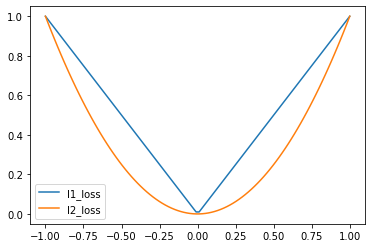

In [27]:
with tf.Session() as sess:
    x_,l1_,l2_ = sess.run([x_guess, l1_loss, l2_loss])
    plt.plot(x_,l1_,label='l1_loss')
    plt.plot(x_,l2_,label='l2_loss')
    plt.legend()
    plt.show()